<h1 > 
    <center> Uber Drivers Trips Analysis
    </center>
</h1>

<h2> 
    <center>1. Table of Contents: 
    </center>
</h2>

- Objective
- Background
- Descriptive Statistics
- Exploratory Data Analysis
- Conclusions
- Business Insights

<h2> 
    <center>2. Objective: 
    </center>
</h2>

The objective of this project is to analyze the various aspects of car trips by doing **Descriptive Statistics** and **Exploratory Data Analysis**. Additionally, in this project **inferences** are also added for each observation so as to create business insights and value. 

<h2> 
    <center>3. Background: 
    </center>
</h2>

Uber is the world's largest cab hailing service. Uber tracks data of their drivers and their trips as this data is used to further imporve it's machine learning models and helps derive business insights. 

<br>

The dataset "uberdrives.csv" has data about:
- Start and end times of the trip
- Category
- Start and stop destination
- Miles
- Purpose

<h2> 
    <center>4. Descriptive Statistics: 
    </center>
</h2>

### Importing libraries and loading the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

uber_drives = pd.read_csv("uberdrives.csv")

### 4.1 Looking at the last few rows:

In [2]:
uber_drives.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Karachi,Karachi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


### 4.2 Looking at the first few rows:

In [3]:
uber_drives.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


### 4.3 Dimensions of the dataset:

In [4]:
uber_drives.shape

(1155, 7)

In [5]:
print('No of rows is:',uber_drives.shape[0])

No of rows is: 1155


In [6]:
print('No of columns is:',uber_drives.shape[1])

No of columns is: 7


In [7]:
print('Column Names are: \n')

for col in uber_drives.columns:
    print("- "+col)

Column Names are: 

- START_DATE*
- END_DATE*
- CATEGORY*
- START*
- STOP*
- MILES*
- PURPOSE*


### 4.4 Size of the dataset:

In [8]:
uber_drives.size

8085

***Inference***: The original dataset has 1155 rows and 7 columns which are named: START_DATE*, END_DATE*,  CATEGORY*, START*, STOP*, MILES* and, PURPOSE*. The total number of elements in the dataset is 8085.

### 4.5 Datatypes of fields in the dataset:

In [9]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### 4.6 Checking for missing values:

In [10]:
uber_drives.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [11]:
for column in uber_drives.columns:
    percentNull=round((uber_drives[column].isnull().sum())/(uber_drives.shape[0])*100,2)
    print("Missing/Null values in '{}' column is: {}%".format(column,percentNull))

Missing/Null values in 'START_DATE*' column is: 0.0%
Missing/Null values in 'END_DATE*' column is: 0.0%
Missing/Null values in 'CATEGORY*' column is: 0.0%
Missing/Null values in 'START*' column is: 0.0%
Missing/Null values in 'STOP*' column is: 0.0%
Missing/Null values in 'MILES*' column is: 0.0%
Missing/Null values in 'PURPOSE*' column is: 43.46%


***Inference***: The only column that has missing values is PURPOSE*. It has 502 rows with missing values which accounts for 43.46% of the total rows.

### 4.7 Summary statistics of the dataset:

In [12]:
uber_drives.describe(include="all")

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
count,1155,1155,1155,1155,1155,1155.000000,653
unique,1154,1154,2,176,187,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


### 4.8 Outlier Analysis:

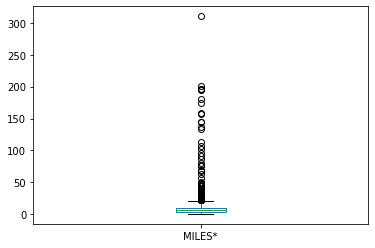

In [13]:
uber_drives.plot(kind='box')

In [14]:
Q1 = uber_drives["MILES*"].quantile(0.25)
Q3 = uber_drives["MILES*"].quantile(0.75)
IQR = Q3 - Q1

In [15]:
((uber_drives["MILES*"] < (Q1 - 1.5 * IQR)) | (uber_drives["MILES*"] > (Q3 + 1.5 * IQR))).sum()

77

***Inference***: The column MILES* has 77 outliers.

### Dropping the missing values

In [16]:
df = uber_drives.dropna()

### Checking information of new dataframe df

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


<h2> 
    <center>5. Exploratory Data Analysis: 
    </center>
</h2>

### 5.1 Unique values in cateogrical variables:

**5.1.1 Category:**

In [18]:
print(df["CATEGORY*"].unique())

['Business' 'Personal']


In [19]:
uber_drives["CATEGORY*"].nunique()

2

**5.1.2 Start:**

In [20]:
print(df["START*"].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh' 'Whitebridge'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Eastgate' 'East Elmhurst'
 'Long Island City' 'Katunayaka' 'Colombo' 'Nugegoda' 'Unknown Location'
 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Preston' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Westpark Place' 'East Austin'
 'The Drag' 'South Congress' 'Georgian Acres' 'North Austin'
 'West University' 'Austin' 'Katy' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Briar Meadow' 'Latta' 'Jacksonville'
 'Lake Reams' 'Orlando' 'Kissimmee' 'Daytona Beach' 'Ridgeland' 'Florence'
 'Meredith' 'Holly Springs' 'Chessingt

In [21]:
uber_drives["START*"].nunique()

176

**5.1.3 Stop:**

In [22]:
print(df["STOP*"].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place' 'Meredith Townes'
 'Leesville Hollow' 'Apex' 'Chapel Hill' 'Williamsburg Manor'
 'Macgregor Downs' 'Edgehill Farms' 'Walnut Terrace' 'Midtown West'
 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo' 'Nugegoda'
 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Northwoods'
 'Depot Historic District' 'West University' 'Congress Ave District'
 'Convention Center District' 'North Austin' 'The Drag' 'Coxville'
 'South Congress' 'Katy' 'Alief' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Greater Greenspoint' 'Latta'
 'Jacksonville' 'Kissimmee' 'Lake Reams' 'Orlando' 'D

In [23]:
uber_drives["STOP*"].nunique()

187

**5.1.4 Purpose:**

In [24]:
print(df["PURPOSE*"].unique())

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [25]:
uber_drives["PURPOSE*"].nunique()

10

***Inference***: The categorical variables have the following number of unique values:

- Category:2
- Start:176
- Stop:187
- Purpose:10

### 5.2 Most Frequently occuring values of categorical variables:

**5.2.1 Category:**

In [26]:
uber_drives["CATEGORY*"].value_counts().head()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

**5.2.2 Start:**

In [27]:
uber_drives["START*"].value_counts().head()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START*, dtype: int64

**5.2.3 Stop:**

In [28]:
uber_drives["STOP*"].value_counts().head()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: STOP*, dtype: int64

**5.2.4 Purpose:**

In [29]:
uber_drives["PURPOSE*"].value_counts().head()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Name: PURPOSE*, dtype: int64

**5.2.5 Route:**

In [30]:
df["ROUTE"] = df['START*']+' to '+df['STOP*']
df["ROUTE"].value_counts().head()

Cary to Morrisville                     52
Morrisville to Cary                     51
Cary to Cary                            44
Unknown Location to Unknown Location    30
Cary to Durham                          30
Name: ROUTE, dtype: int64

***Inference***: The categorical variables have the following most frequently occuring values:

- Category:Business, Personal
- Start:Cary, Unknown, Location, Morrisville, Whitebridge and, Islamabad
- Stop:Cary, Unknown, Location, Morrisville, Whitebridge and, Islamabad
- Purpose: Meeting, Meal/Entertain,  Errand/Supplies,  Customer Visit and, Temporary Site 
- Route:Cary to Morrisville , Morrisville to Cary, Cary to Cary, Cary to Durham, Unknown Location to Unknown Location

### 5.3 Displaying all Uber trips that have starting point as San Francisco: 

In [31]:
uber_drives[uber_drives["START*"] == "San Francisco"]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


### 5.4 Count of Trips VS Categories of Trips:

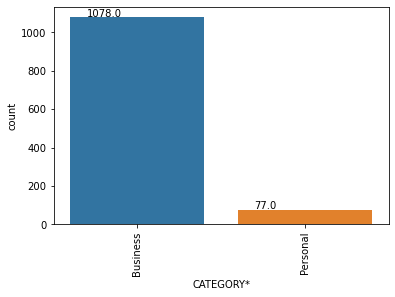

In [32]:
ax=sns.countplot(uber_drives['CATEGORY*'])
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
        
plt.show()

***Inference***: Business trips account for a majority of the trips by category.

### 5.5 Bi Variate Analysis: Visualizing the relation between the variables:

**5.5.1 Purpose VS Miles:**

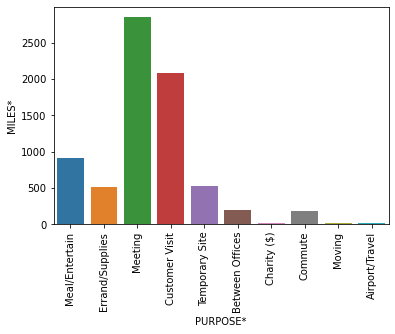

In [33]:
sns.barplot( x='PURPOSE*', y='MILES*', estimator = np.sum, data=uber_drives, ci=None)
plt.xticks(rotation=90)
plt.show()

***Inference***: Meeting is the purpose for which the sum of miles is the maximum.

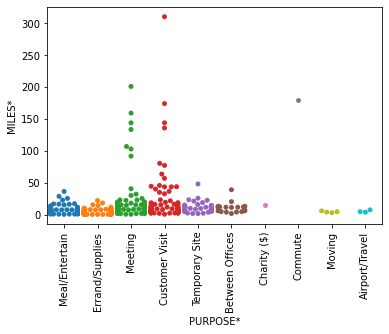

In [34]:
sns.swarmplot(x="PURPOSE*", y = "MILES*", data=uber_drives)
plt.xticks(rotation=90)
plt.show()

***Inference***: Although Meeting has the most sum, Customer Visit has a lot of outliers as well.

**Total Miles and Percentage of Miles by Purpose:**

In [35]:
df_1 = uber_drives.groupby("PURPOSE*").sum()
df_1["Percentage of Miles"] = 100*df_1["MILES*"]/df_1["MILES*"].sum()
df_1

,MILES*,Percentage of Miles
PURPOSE*,,
Airport/Travel,16.5,0.225681
Between Offices,197.0,2.694496
Charity ($),15.1,0.206532
Commute,180.2,2.464712
Customer Visit,2089.5,28.579440
Errand/Supplies,508.0,6.948244
Meal/Entertain,911.7,12.469909
Meeting,2851.3,38.999070
Moving,18.2,0.248933


***Inference***: Meeting and Customer Visit are the most popular purpose and account for 38.99% and 28.57% of the trips respectively.

**5.5.2 Category VS Miles:**

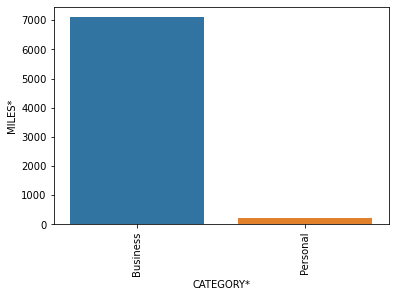

In [36]:
sns.barplot( x='CATEGORY*', y='MILES*', estimator = np.sum, data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

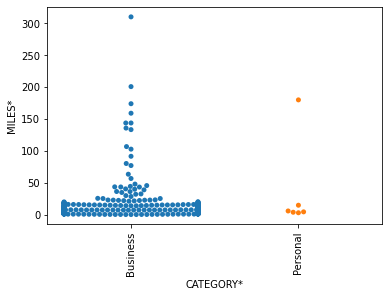

In [37]:
sns.swarmplot(x="CATEGORY*", y = "MILES*", data=df)
plt.xticks(rotation=90)
plt.show()

**Total Miles and Percentage of Miles by Category:**

In [38]:
df_2 = uber_drives.groupby("CATEGORY*").sum()
df_2["Percentage of Miles"] = 100*df_2["MILES*"]/df_2["MILES*"].sum()
df_2

,MILES*,Percentage of Miles
CATEGORY*,,
Business,11487.0,94.119479
Personal,717.7,5.880521


***Inference***: Business trips account for a majority of the trips by category, ie, 94.12%.

**5.5.3 Purpose & Category VS Miles:**

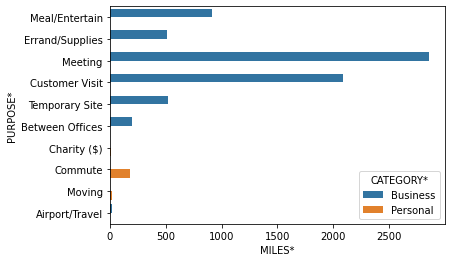

In [39]:
sns.barplot( x='MILES*', y='PURPOSE*', estimator = np.sum, data=uber_drives, ci=None, hue = "CATEGORY*")
plt.show()

***Inference***: In the Business cateogry the most popular purpose is Meeting. In the Personal category the most popular purpose is Commute.

**5.5.4 Start Date - Hour VS Miles:**

In [40]:
uber_drives['START_DATE*'] = uber_drives['START_DATE*'].astype('datetime64[ns]')
uber_drives['START_HOUR'] = pd.DatetimeIndex(uber_drives['START_DATE*']).hour

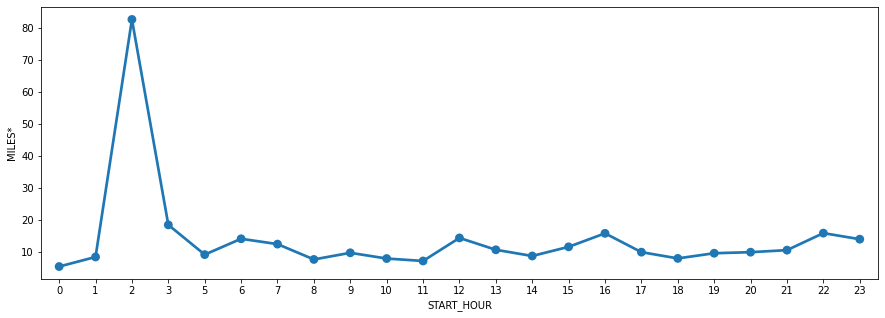

In [41]:
plt.figure(figsize=(15,5))
sns.pointplot(uber_drives['START_HOUR'], uber_drives['MILES*'],ci=None)
plt.show()

***Inference***: The most popular start hour of the day is 2 AM. The least popular start hour of the day is 12 PM.

**5.5.5 Start Date - Day VS Miles:**

In [42]:
uber_drives['START_DATE*'] = uber_drives['START_DATE*'].astype('datetime64[ns]')
uber_drives['START_DAY'] = pd.DatetimeIndex(uber_drives['START_DATE*']).day

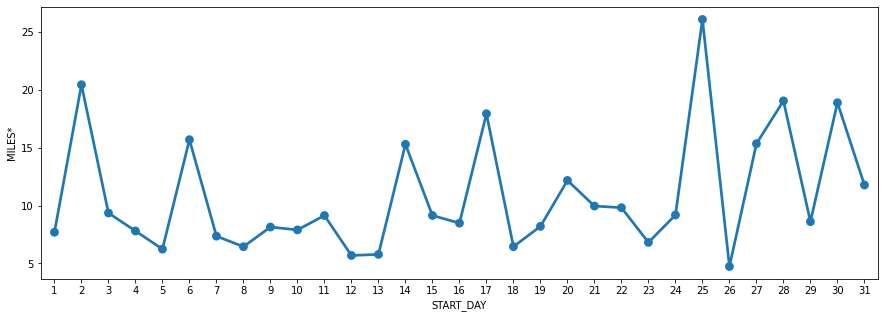

In [43]:
plt.figure(figsize=(15,5))
sns.pointplot(uber_drives['START_DAY'], uber_drives['MILES*'],ci=None)
plt.show()

***Inference***: The most popular day of the month is 25th. The least popular day of the month is 26th.

**5.5.6 Start Date - Month VS Miles:**

In [44]:
uber_drives['START_DATE*'] = uber_drives['START_DATE*'].astype('datetime64[ns]')
uber_drives['START_MONTH'] = pd.DatetimeIndex(uber_drives['START_DATE*']).month

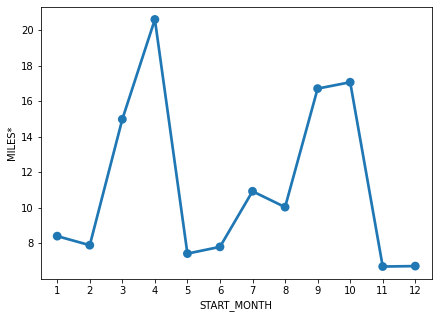

In [45]:
plt.figure(figsize=(7,5))
sns.pointplot(uber_drives['START_MONTH'], uber_drives['MILES*'],ci=None)
plt.show()

***Inference***: The most popular month of the year is April. The least popular month of the year is December.

<h2> 
    <center>6. Conclusions: 
    </center>
</h2>

- The original dataset has 1155 rows and 7 columns which are named: START_DATE, END_DATE, CATEGORY, START, STOP, MILES and, PURPOSE*. The total number of elements in the dataset is 8085.
- The only column that has missing values is PURPOSE*. It has 502 rows with missing values which accounts for 43.46% of the total rows.
- The column MILES* has 77 outliers.
- The categorical variables have the following number of unique values:
    - Category:2
    - Start:176
    - Stop:187
    - Purpose:10
- The categorical variables have the following most frequently occuring values:
    - Category:Business, Personal
    - Start:Cary, Unknown, Location, Morrisville, Whitebridge and, Islamabad
    - Stop:Cary, Unknown, Location, Morrisville, Whitebridge and, Islamabad
    - Purpose: Meeting, Meal/Entertain, Errand/Supplies, Customer Visit and, Temporary Site
    - Route:Cary to Morrisville , Morrisville to Cary, Cary to Cary, Cary to Durham, Unknown Location to Unknown Location 
- Business trips account for a majority of the trips by category.
- Meeting is the purpose for which the sum of miles is the maximum.
- Although Meeting has the most sum, Customer Visit has a lot of outliers as well.
- Meeting and Customer Visit are the most popular purpose and account for 38.99% and 28.57% of the trips respectively.
- Business trips account for a majority of the trips by category, ie, 94.12%.
- In the Business cateogry the most popular purpose is Meeting. In the Personal category the most popular purpose is Commute.
- The most popular start hour of the day is 2 AM.
- The most popular day of the month is 25th.
- The most popular month of the year is April.
- The least popular start hour of the day is 12 PM
- The least popular day of the month is 26th.
- The least popular month of the year is December.

<h2> 
    <center>7. Business Insights: 
    </center>
</h2>

- Since the column PURPOSE* has 43.46% missing values, Uber should focus on **getting more data about the purpose** of the trip. Lots of missing values may be problematic for machine learning models.
- Since Business trips account for 94.12% of the trips, Uber should focus on **collaborations with companies and corporate entities**.
- The most popular start and stop destinations are: Cary, Morrisville, Whitebridge and, Islamabad. Similarly the most popular route is Cary to Morrisville. Uber should focus on **building it's capacity of cars** for these cities and routes.
- The most popular hour, day and month is: 2AM, 25th and April respectively. Uber should be **prepared the handle surges** during these times.
- The least popular hour, day and month is: 12PM, 26th and December respectively. Uber should should **run promotion campaigns** during these times.